In [1]:
#Opioid Overdose Deaths by Type of Opioid

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Opioid2017.csv')
df_clean = df.replace('NSD', 0)
df_clean.head()

,Location,"Natural and Semisynthetic Opioids (e.g. oxycodone, hydrocodone)","Synthetic Opioids, other than Methadone (e.g. fentanyl, tramadol)",Methadone,Heroin
0,United States,14495,28466,3194,15482
1,Alabama,141,198,30,125
2,Alaska,47,37,0,36
3,Arizona,349,267,83,334
4,Arkansas,116,68,17,15


In [4]:
df_clean = df_clean.set_index('Location')
df_clean = df_clean.rename({'Synthetic Opioids, other than Methadone (e.g. fentanyl, tramadol)': 'Synthetic', 'Natural and Semisynthetic Opioids (e.g. oxycodone, hydrocodone)': 'Semisynthetic'}, axis='columns')

In [15]:
df_clean = df_clean.drop('United States')
df_clean.head()

,Semisynthetic,Synthetic,Methadone,Heroin
Location,,,,
Alabama,141,198,30,125
Alaska,47,37,0,36
Arizona,349,267,83,334
Arkansas,116,68,17,15
California,973,536,253,715


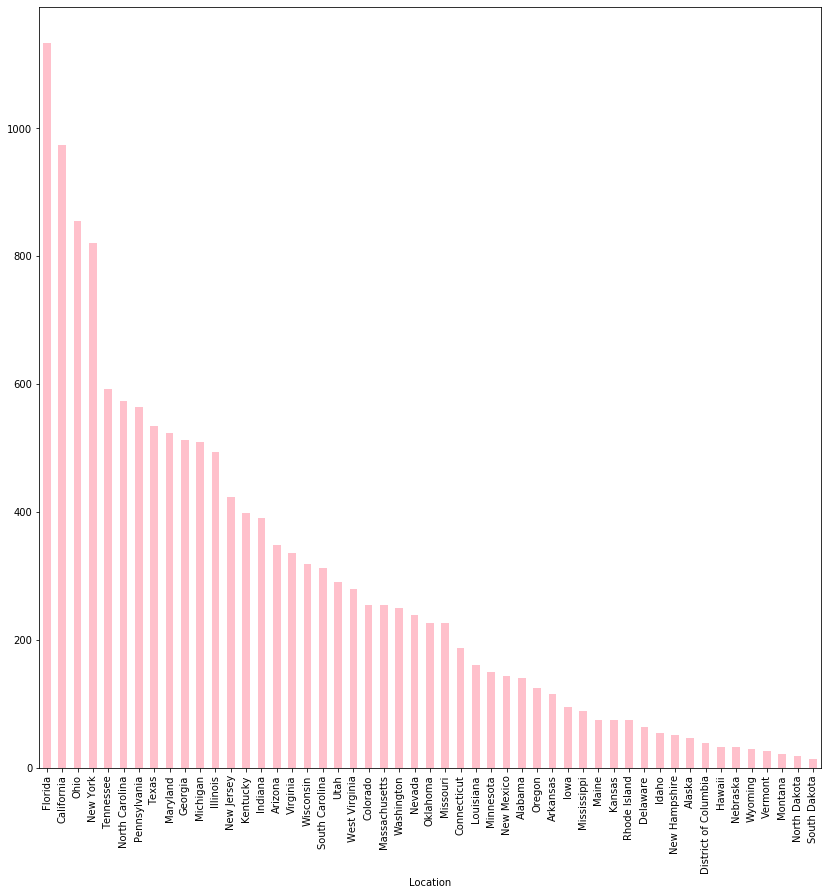

In [16]:
df_semisynthetic = df_clean.groupby(['Location'])['Semisynthetic'].sum()
df_semisynthetic.sort_values(ascending = False).plot(kind='bar', figsize=(14,14),color = 'Pink')
#Florida is the biggest user of Natural and Semisynthetic Opioids

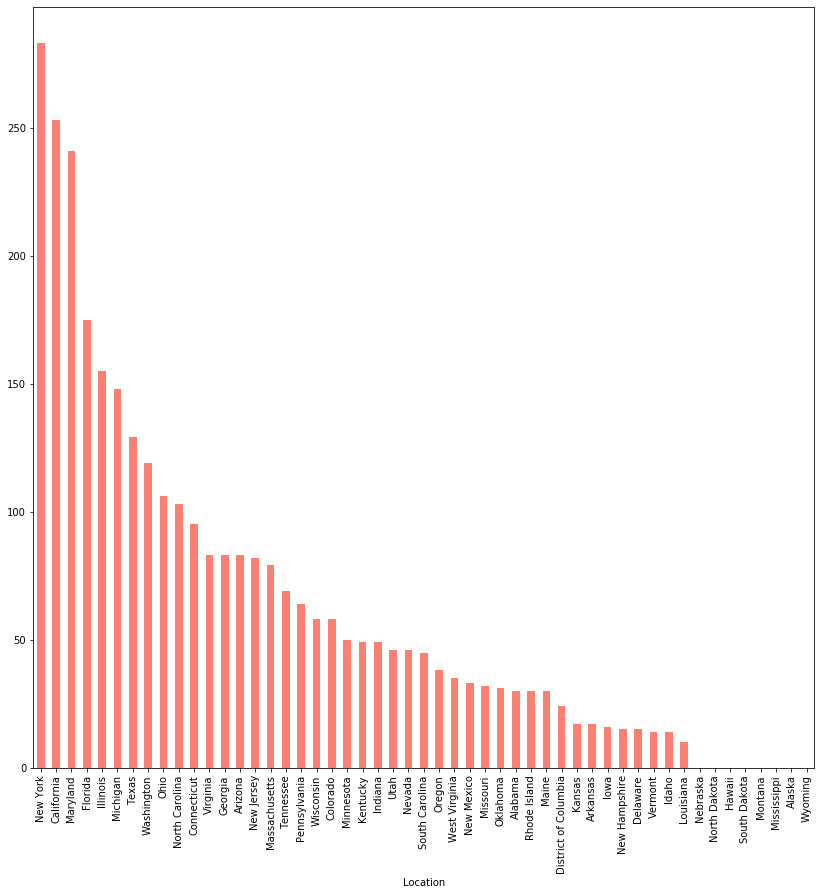

In [17]:
df_methadone = df_clean.sum(level='Location',axis = 1)['Methadone']
df_methadone.sort_values(ascending = False).plot(kind = 'bar', figsize=(14,14), color = 'Salmon')
#New York is the biggest user of Methadone.

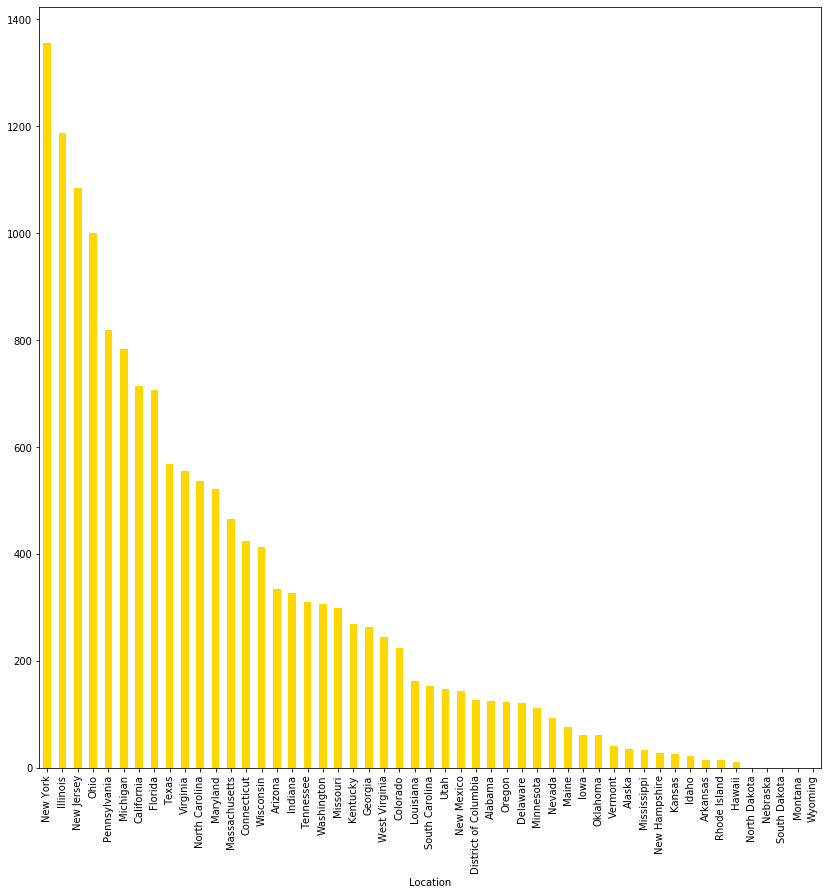

In [18]:
df_heroin = df_clean.sum(level='Location',axis = 1)['Heroin']
df_heroin.sort_values(ascending = False).plot(kind = 'bar', figsize=(14,14), color = 'gold')
#New York is the biggest user of Heroin.

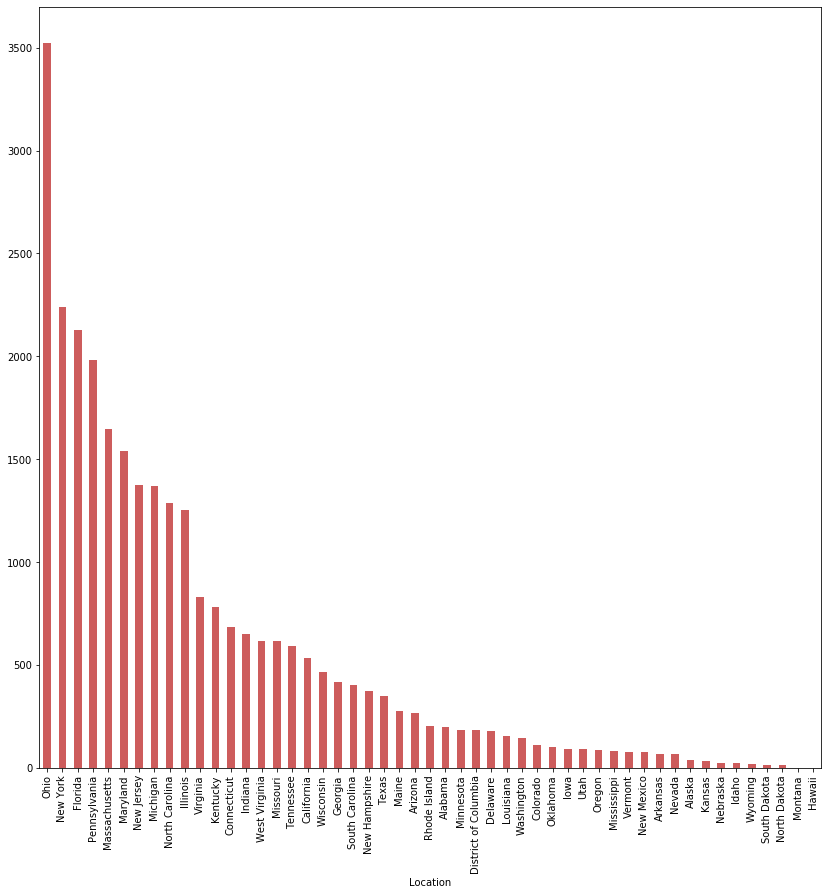

In [19]:
df_synthetic = df_clean.sum(level='Location',axis = 1)['Synthetic']
df_synthetic.sort_values(ascending = False).plot(kind = 'bar', figsize=(14,14), color = 'IndianRed')

#Ohio is the biggest user of Fentanly, Tramadol, etc.

In [20]:
df_synthetic.mean()

557.9019607843137

In [21]:
df_semisynthetic.mean()

284.2156862745098

In [22]:
df_heroin.mean()

302.94117647058823

In [23]:
df_methadone.mean()

61.80392156862745